# Vizuelizacija podataka u Pythonu

Jedan od najpopularnijih načina za vizuelizaciju podataka u Pythonu podrazumeva korišćenje Matplotlib biblioteke funkcija. Najčešće korišćene funkcije za vizuelizaciju su deo pyplot modula Matplolib biblioteke. Ovaj modul omogućava iscrtavanje tipskih grafika, vezanih za statističku analizu, kao što su histogrami, kutijasti dijagrami i drugi. Modul omogućava kontrolu prikaza svih elemenata jednog dijagrama ili grafika, odnosno stilove linija i osa, veličinu i oblik fonta itd.

Da bi funkcije vizuelizacije mogle da se koriste, najpre se uvozi ovaj modul.

In [1]:
from matplotlib import pyplot as plt

Za demonstraciju funkcija i načina vizuelizacije, koristi se skup podataka za predviđanje cene nekretnine u određenom bloku u Kaliforniji, na osnovu karakteristika tog bloka i same nekretnine. Ulazne veličine sa podacima su:
- Geografska dužina - što je vrednost veća, kuća ima zapadniju lokaciju
- Geografska širina - što je vrednost veća, kuća ima severniju lokaciju
- Prosečna starost kuće u bloku
- Ukupan broj soba u bloku
- Ukupan broj spavaćih soba u bloku
- Ukupan broj stanovnika u bloku
- Ukupan broj domaćinstava u bloku
- Prosečan (medijana) prihod jednog domaćinstva u bloku, mereno u desetinama hiljada USD
- Prosečna vrednost (medijana) jedne stambene jedinice u bloku

In [2]:
import pandas as pd
df=pd.read_csv('kurs_california_housing_withnames.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500


## Priprema podataka u oglednom primeru

Radi ilustrativnije vizuelizacije, odnosno vrednosti zaključaka koji se mogu doneti na osnovu vizuelizacije, izvršena je određena priprema podataka u okviru skupa koji se koristi kao ogledni.

Prvo, kreirana je nova veličina sa nazivom rooms koja ukazuje na celobrojnu prosečnu vrednost broja spavaćih soba. Drugo, kreira se nova veličina income_category u koju se smešta tekst: lower, lower-middle, upper-middle ili upper, u zavisnosti od intervala u kojem se nalazi vrednost srednjeg prihoda domaćinstva u određenom stambenom bloku.

In [3]:
df['bedrooms']=round(df['total_bedrooms']/df['households']).astype('int')
df['income_category']='NewVal'
df.loc[df['median_income']<1,'income_category']='lower'
df.loc[(df['median_income']>=1) & (df['median_income']<4),'income_category']='lower-middle'
df.loc[(df['median_income']>=4) & (df['median_income']<7),'income_category']='upper-middle'
df.loc[df['median_income']>=7,'income_category']='upper'
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms,income_category
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900,3,lower-middle
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100,4,lower-middle
2,-114.56,33.69,17,720,174,333,117,1.6509,85700,1,lower-middle
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400,1,lower-middle
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500,1,lower-middle


## Ilustracija zavisnosti dve kontinualne veličine

Funkcija plot pyplot modula se može koristiti za crtanja skoro svih grafikona i dijagrama, potrebnih za analizu podataka. Osnovni oblik za njeno korišćenje je:

1. pozivanje funkcije plot pyplot modula sa minimalnim skupom argumenata potrebnim za prikaz dijagrama ili grafikona
2. pozivanje metode show() pyplot modula.

Funkcija zavisnosti dve veličine se može uočiti na dijagramu koji prikazuje tačke sa vrednostima te dve veličine na x i y osi, koje eventualno mogu biti povezane izlomljenom linijom ili krivom provučenom kroz karakteristične tačke (u redosledu koji je određen redosledom navođenja vrednosti). Za prikaz grafika funkcije zavisnosti, minimalno potrebni argumenti su dva niza u kojima su smeštene vrednosti jedne i druge veličine. Ovi nizovi mogu liste ili numpy nizovi. Vrednosti prvog navedenog niza će se tumačiti kao vrednosti X koordinata tačaka funkcije zavisnosti, a vrednosti drugog niza - kao vrednosti Y koordinata.

U dole navedenom primeru, nizovi sadrže koordinate 5 tačaka, koje ukazuju na kvadratnu funkciju.

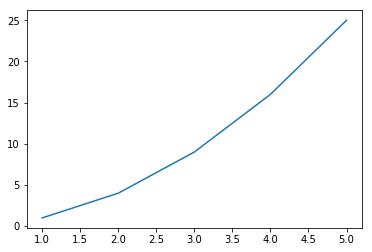

In [4]:
xdata=[1,2,3,4,5]
ydata=[1,4,9,16,25]
plt.plot(xdata,ydata)
plt.show()

### Format prikaza grafika kojim se ilustruje zavisnost dve veličine

Opcioni treći argument plot funkcije je string koji ukazuje na format željenog prikaza grafika. String se sastoji od minimalno jednog, a maksimalno tri ili tri niza karaktera.

Prvi karakter ukazuje na boju iscrtane funkcije ili karakterističnih tačaka: 'b'-blue, 'g'-green, 'r'-red, 'c'-cyan, 'm'-magenta, 'y'-yellow, 'k'-black, 'w'-white. Drugi karakter ukazuje na markere, odnosno oblike ucrtanih tačaka (kada grafik prikazuje samo karakteristične tačke). Neke od mogućih vrednosti su: '.'-point marker, ','-pixel marker, 'o'-circle marker, 'v'-triangle_down marker, '^'-triangle_up marker. Treći karakter, ili niz karaktera, ukazuje na tip linije (kada grafik prikazuje izlomljenu liniju koja povezuje karakteristične tačke). Moguće vrednosti su: '-'-solid line style, '--'-dashed line style, '-.'-dash-dot line style, ':'-dotted line style.

Primeri dole prikazuju izgled stringa koji ukazuje na dva formata: 1) prikaz karakterističnih tačaka u formatu crvenih trouglova, i 2) prikaz plave izlomljene isprekidane linije koja povezuje karakteristične tačke.

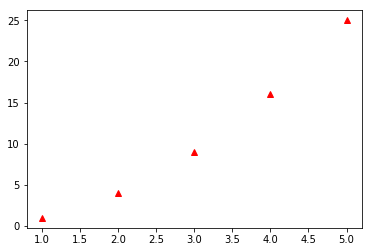

In [5]:
xdata=[1,2,3,4,5]
ydata=[1,4,9,16,25]
plt.plot(xdata,ydata,'r^')
plt.show()

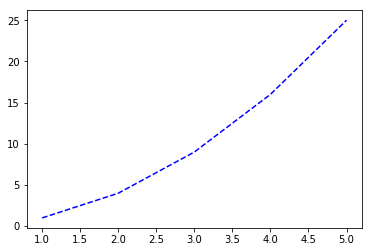

In [6]:
xdata=[1,2,3,4,5]
ydata=[1,4,9,16,25]
plt.plot(xdata,ydata,'b--')
plt.show()

U donjem primeru je prikazan grafik koji ilustruje zavisnosti vrednosti stambene jedinice od vrednosti prosečnih primanja po domaćinstvu. Radi bolje preglednosti, primer uzima u obzir samo prvih 500 vrednosti ove dve veličine.

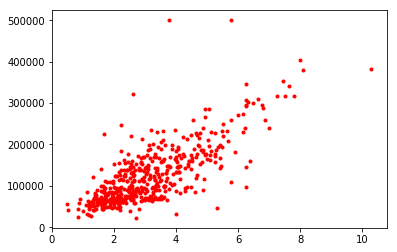

In [7]:
xdata=df['median_income'].values[:500]
ydata=df['median_house_value'].values[:500]
plt.plot(xdata,ydata,'r.')
plt.show()

Grafik koji prikazuje sve tačke koje odgovaraju vrednostima iz skupa podataka se naziva još i dijagram raspršenosti. Ovaj grafik je moguće prikazati i korišćenjem metode scatter pyplot objekta.

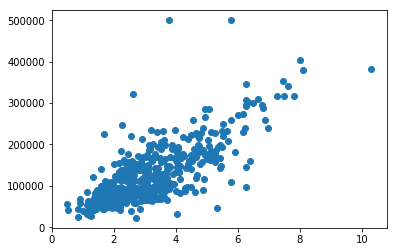

In [8]:
xdata=df['median_income'].values[:500]
ydata=df['median_house_value'].values[:500]
plt.scatter(xdata, ydata)
plt.show()

### Prikaz više ilustracija zavisnosti na istom grafiku

Iscrtavanje više ilustracija zavisnosti se može izvršiti višestrukim navođenjem plot metode sa argumentima koji odgovaraju različitim prikazima ili navođenjem više trojki kao argumenata jednom pozvane plot metode, pri čemu svaka trojka odgovara argumentima prikaza jedne ilustracije zavisnosti.

U donjem primeru se ova dva pristupa kombinuju (prva dva skupa su opisana u jednom pozivu metode plot, a treći - u posebnom pozivu). U donjem primeru, karakteristične tačke se zadaju u obliku numpy nizova, jer ovi nizovi omogućavaju matematičke operacije stepenovanja, koje su korišćene za proračun y vrednosti karakterističnih tačaka.

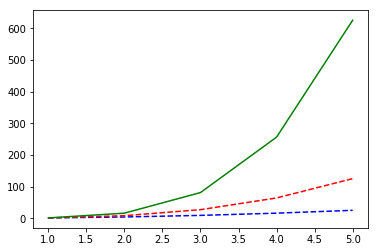

In [9]:
import numpy as np
xdata=[1,2,3,4,5]
xdarr=np.array(xdata)
plt.plot(xdarr,xdarr**2,'b--',xdarr,xdarr**3,'r--')
plt.plot(xdarr,xdarr**4,'g-')
plt.show()

### Ostali elementi grafika 

U donjem primeru su prikazane samo neke mogućnosti za upravljanje prikazom različitih elemenata grafika. Inače, sve metode pyplot objekta su opisane na ovoj strani: https://matplotlib.org/api/pyplot_summary.html. Na grafiku dole koristi se:

- axis metoda pyplot objekta za definisanje gornjih i donjih granica podataka na x (prva dva podatka u nizu koji je argument metode) i y osi (druga dva podatka)
- xlabel i ylabel metode za definisanje naziva osa, odnosno navođenje veličina čiji su podaci na toj osi
- legend metoda za prikaz legende grafika, odnosno navođenje značenja prikazanih skupova tačaka na grafiku
- title metoda za navođenje naslova grafika

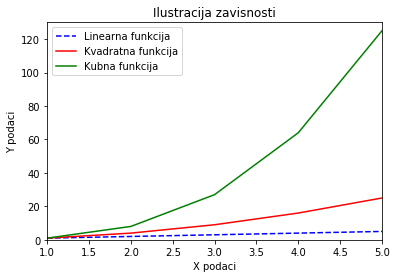

In [10]:
xdata=[1,2,3,4,5]
xdarr=np.array(xdata)
plt.plot(xdarr,xdarr,'b--')
plt.plot(xdarr,xdarr**2,'r-')
plt.plot(xdarr,xdarr**3,'g-')
plt.axis([1,5,0,130])
plt.ylabel('Y podaci')
plt.legend(['Linearna funkcija','Kvadratna funkcija','Kubna funkcija'])
plt.xlabel('X podaci')
plt.title('Ilustracija zavisnosti')
plt.show()

## Prikaz više grafika u jednoj celini

Ponekad je potrebno prikazati više grafika u jednoj celini, zbog uporedne analize. U tom slučaju, pre pozivanja metode za prikaz pojedinačnog grafika, potrebno je izvršiti određene pripreme. 

Prvo, potrebno je kreirati sliku, korišćenjem metode figure. Argumenti čije vrednosti je tom prilikom poželjno definisati su identifikator slike (ukoliko se u istom programu kreira više slika) i dimenzije slike u inčima (širina, visina). 

Drugo, pre prikaza svakog grafika, potrebno je kreirati celinu u okviru kreirane slike u kojoj se taj grafik prikazuje. To se vrši korišćenjem metode subplot. Argument metode subplot koji se obavezno definiše je trocifreni celi broj, čije cifre imaju sledeće značenje: prva i druga cifra ukazuju na dimenzije strukture u okviru koje se vrši prikazivanje subplotova (odnosno, pojedinačnih grafika u njima), odnosno broj redova i broj kolona; treća cifra ukazuje na redosled prikazivanja subplotova.

Rastojanjem između subplotova se može upravljati. Metod subplots_adjust omogućava definisanje horizontalnog (parametar hspace) i vertikalnog (parametar wspace) rastojanja između subplotova u strukturi.

Za definisanje naslova cele slike, koristi se metoda suptitle pyplot objekta. Istovremeno korišćenje metoda title i suptitle nema smisla kod definisanja naslova slike sa više grafika.

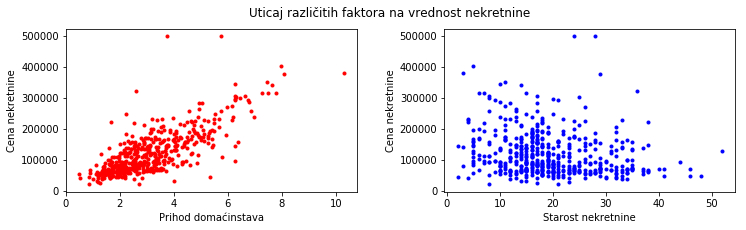

In [11]:
ydata=df['median_house_value'].values[:500]
xdata1=df['median_income'].values[:500]
xdata2=df['housing_median_age'].values[:500]

plt.figure(1,figsize=(12,3))

plt.subplot(121)
plt.plot(xdata1,ydata,'r.')
plt.ylabel('Cena nekretnine')
plt.xlabel('Prihod domaćinstava')

plt.subplot(122)
plt.plot(xdata2,ydata,'b.')
plt.ylabel('Cena nekretnine')
plt.xlabel('Starost nekretnine')
plt.suptitle('Uticaj različitih faktora na vrednost nekretnine')

plt.subplots_adjust(wspace=0.3)
plt.show()

## Ilustracija raspodele vrednosti veličine

Najčešće korišćeni alat za ilustraciju raspodele vrednosti veličina je histogram. Histogram je stubičasti grafik (bar plot) koji ilustruje broj podataka u različitim intervalima njihove vrednosti (ukoliko je veličina kontinualna) ILI sve vrednosti tih podataka, ukoliko se radi o podatku tipa kategorije. Dakle: 

- histogram prikazuje onoliko stubića, koliko ima intervala ILI vrednosti tipa kategorije
- na x osi su označene sve moguće vrednosti kontinualne veličine, sa označenim granicama intervala ili veličine tipa kategorije
- na y osi su označeni brojevi pojavljivanja vrednosti u intervalu ILI vrednosti veličine tipa kategorije

Za prikazivanje histograma za kontinualne veličine, koristi se metod hist pyplot objekta. Jedini obavezan argument je niz sa podacima. U primeru dole, koristi se i opseg vrednosti koji treba uzeti u obzir prilikom iscrtavanja histograma. 

Za prikazivanje histograma za veličine tipa kategorije, najpre se formiraju nizovi koji sadrže: 1) moguće vrednosti veličine tipa kategorije i 2) brojevi njihovih pojavljivanja u skupu podataka. Najefikasniji način za to je korišćenje funkcije grupisanja podataka DataFrame strukture. Potom, potrebne vrednosti se dobijaju pozivanjem metoda index (za moguće vrednosti veličine tipa kategorije) i values (za broj njihovog pojavljivanja u skupu podataka). Ovo zadnje važi u slučaju kada je veličina koja sadrži podatke tipa kategorije tipa Object. U slučaju da je ona transformisana u veličinu tipa kategorije (sa npr. df['income_dategory']=df['income_dategory'].astype('category')), moguće vrednosti veličine bi se dobile pozivom xdata2.index.categories. 

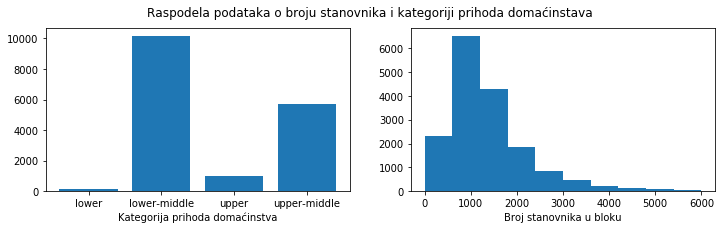

In [12]:
xdata1=df['population']
xdata2=df.groupby('income_category').size()

plt.figure(1,figsize=(12,3))
plt.subplot(121)
plt.bar(xdata2.index, xdata2.values)
plt.xlabel('Kategorija prihoda domaćinstva')

plt.subplot(122)
plt.hist(xdata1, range=(0,6000))
plt.xlabel('Broj stanovnika u bloku')
plt.suptitle('Raspodela podataka o broju stanovnika i kategoriji prihoda domaćinstava')
plt.show()

## Funkcije vizuelizacije podataka DataFrame i Series struktura

DataFrame i Series objekti imaju metodu plot uz čiju pomoć je moguća vizuelizacija podataka koji su skladišteni u njima. Vrsta željenog grafika se definiše navođenjem vrednosti argumenta kind, plot metode. Moguće vrednosti kind argumenta su:

- 'bar' or 'barh' za stubičaste grafike
- 'line' za dijagrame sa izlomljenim linijama
- 'hist' za histograme
- 'box' za kutijaste dijagrame
- 'kde' or 'density' za density grafike
- 'area' za area grafike
- 'scatter' za dijagrame raspršenosti
- 'pie' za pite

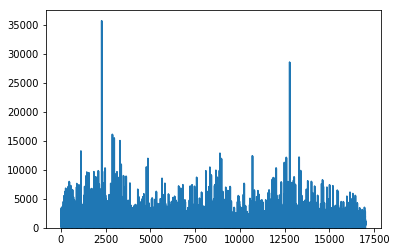

In [13]:
df['population'].plot(kind='area')
plt.show()

Kod grafika koji uzimaju obzir podatke dve veličine, argumenti x i y se koriste za navođenje naziva tih veličina. Opciono, argument color se može koristiti za navođenje boje elemenata grafika. U primeru dole, prikazan je dijagram raspršenosti podataka za veličine median_income i median_house_value.

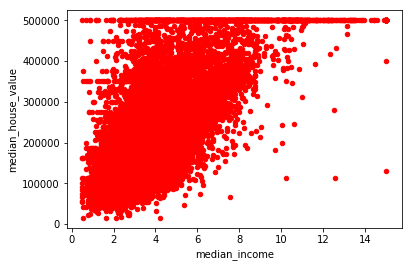

In [14]:
df.plot(kind='scatter',x='median_income',y='median_house_value', color='red')
plt.show()

Primeri prikaza grafika sa izlomljenim linijama i stubičastih grafika su prikazani dole. U prvom primeru je prikazan grafik sa prvih pet tačaka (iloc), čiji je redosled prikaza uređen po rastućem redosledu (sort_values('population')). U drugom primeru je prikaz stubičasti grafik koji prikazuje srednje vrednosti (medijana) vrednosti nekretnina, grupisano po kategoriji prihoda.

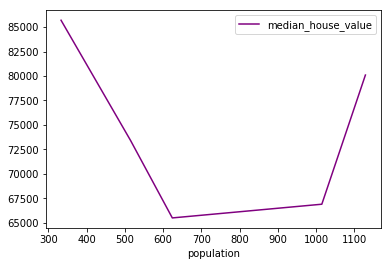

In [15]:
df.iloc[:5].sort_values('population').plot(kind='line',x='population',y='median_house_value',color='purple')
plt.show()

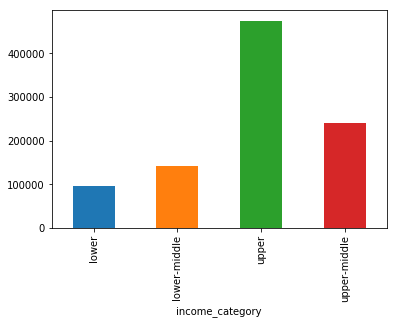

In [16]:
df.groupby('income_category')['median_house_value'].median().plot(kind='bar')
plt.show()